# <font color="#8333ff">TP : Pratiquez la régression linéaire multiple sur le jeu de données de l'ozone</font>

Appliquons la régression linéaire multiple à l'échantillon ozone.
Modélisons le pic d'ozone journalier en fonction de toutes les autres variables météorologiques.

## Importez les données

On importe les librairies qui nous permettront de mener à bien ce TP :

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
#from functions import *

In [3]:
ozone = pd.read_csv('ozone.txt', sep=";", decimal=',')

In [4]:
#ozone["T18"]=ozone["T9"]*1.1

Etant donné le dataframe suivant :

In [5]:
ozone.head()

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
1,602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
2,603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
3,604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
4,605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec


Quel résultat donnera la commande suivante ?

In [6]:
ozone.T9

0      15.6
1      17.0
2      15.3
3      16.2
4      17.4
       ... 
107    13.3
108    16.2
109    16.9
110    16.9
111    15.7
Name: T9, Length: 112, dtype: float64

In [7]:
ozone.pluie

0        Sec
1        Sec
2        Sec
3        Sec
4        Sec
       ...  
107      Sec
108    Pluie
109      Sec
110    Pluie
111      Sec
Name: pluie, Length: 112, dtype: object

In [8]:
ozone.Vx15

0     -0.6946
1     -3.0000
2      0.5209
3     -0.1736
4     -4.3301
        ...  
107   -1.2856
108   -1.3681
109    0.8682
110   -4.0000
111   -4.0000
Name: Vx15, Length: 112, dtype: float64

On importe les données, puis on utilise la commande  lm  pour régresser maxO3 en fonction des autres variables de l'échantillon.

In [9]:

reg_multi = smf.ols('maxO3~T9+T12+T15+Ne9+Ne12+Ne15+maxO3v', data=ozone).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     45.68
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           6.06e-29
Time:                        11:00:29   Log-Likelihood:                -453.71
No. Observations:                 112   AIC:                             923.4
Df Residuals:                     104   BIC:                             945.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.7055     13.109      0.969      0.3

On constate ici que certains paramètres ne sont pas significativement différents de 0, car leur p-valeur n'est pas inférieure à 5 %, le niveau de test que nous souhaitons.

Le $R^{2}$ vaut environ 0.75, et le $R^{2}$ ajusté est d'environ 0.74.

*Cette valeur est plus élevée qu'en régression linéaire simple, et c'est logique, car lorsque l'on rajoute des variables explicatives potentielles, on accroît naturellement la valeur de ces $R^{2}$.*

## Retirez les variables non significatives

On va donc maintenant retirer les variables non significatives. On commence par la moins significative : Ne15, car elle a une p-valeur de 0.93.

In [10]:
reg_multi = smf.ols('maxO3~T9+T12+T15+Ne9+Ne12+maxO3v', data=ozone).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     53.80
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           7.91e-30
Time:                        11:00:29   Log-Likelihood:                -453.71
No. Observations:                 112   AIC:                             921.4
Df Residuals:                     105   BIC:                             940.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8492     12.950      0.992      0.3

On voit alors que c'est maintenant Ne12, avec une p-valeur de 0.79, qui est la moins significative. On l'enlève donc.

In [11]:
reg_multi = smf.ols('maxO3~T9+T12+T15+Ne9+maxO3v', data=ozone).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     65.11
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           9.62e-31
Time:                        11:00:29   Log-Likelihood:                -453.75
No. Observations:                 112   AIC:                             919.5
Df Residuals:                     106   BIC:                             935.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2844     11.534      0.978      0.3

On constate qu'il faut maintenant retirer la variable T9 :  

In [12]:
reg_multi = smf.ols('maxO3~T12+T9+Ne9+maxO3v', data=ozone).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     81.64
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.27e-31
Time:                        11:00:29   Log-Likelihood:                -454.02
No. Observations:                 112   AIC:                             918.0
Df Residuals:                     107   BIC:                             931.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.8376     11.481      1.031      0.3

Et l'on retire ensuite T15 :

In [13]:
reg_multi = smf.ols('maxO3~T12+Ne9+maxO3v', data=ozone).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     109.1
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           1.46e-32
Time:                        11:00:30   Log-Likelihood:                -454.30
No. Observations:                 112   AIC:                             916.6
Df Residuals:                     108   BIC:                             927.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7622     11.100      0.879      0.3

On remarque qu'à présent, tous les paramètres sont significatifs. Quant au $R^{2}$, il vaut environ 0.75, tout comme le $R^{2}$ ajusté.

*On peut donc utiliser ce modèle à des fins de prévision !*

Si l'on souhaite prévoir la concentration journalière en ozone, sachant que la température prévue à 12 h sera de 15 °C, que la valeur de Ne9 sera de 2, et que la concentration maxO3v de la veille vaut 100, alors on saisit les lignes suivantes :

In [14]:
a_prevoir = pd.DataFrame({'T12': [15,16,17,18], 'Ne9': [2,3,1,5], 'maxO3v': [100,50,150,200]})
a_prevoir 

,T12,Ne9,maxO3v
0,15,2,100
1,16,3,50
2,17,1,150
3,18,5,200


In [15]:
maxO3_prev = reg_multi.predict(a_prevoir)

maxO3_prev 

0     84.081255
1     65.124453
2    111.597292
3    121.139097
dtype: float64

In [16]:
a_prevoir["pred"] = maxO3_prev 

a_prevoir

,T12,Ne9,maxO3v,pred
0,15,2,100,84.081255
1,16,3,50,65.124453
2,17,1,150,111.597292
3,18,5,200,121.139097


In [17]:
a_prevoir = pd.DataFrame({'T12': [15,16,17,18], 'Ne9': [2,3,1,5], 'maxO3v': [100,50,150,200]})
maxO3_prev = reg_multi.predict(a_prevoir)
print(round(maxO3_prev[0], 2))

84.08


In [18]:
maxO3_prev

0     84.081255
1     65.124453
2    111.597292
3    121.139097
dtype: float64

In [19]:
a_prevoir

,T12,Ne9,maxO3v
0,15,2,100
1,16,3,50
2,17,1,150
3,18,5,200


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = ozone[['T12','T9','Ne9','maxO3v']]

#X = ozone[['obs', 'T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9','Vx12', 'Vx15', 'maxO3v']]
y = ozone[['maxO3']]

In [22]:
X.shape

(112, 4)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
X_test.shape

(34, 4)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
regression_model = LinearRegression()
# Adapter les données (entraînement du modèle)
regression_model.fit(X_train, y_train)
# Prédiction


LinearRegression()

In [27]:
y_train_pred = regression_model.predict(X_train)

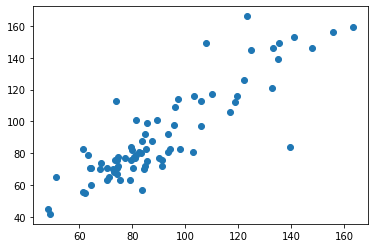

In [28]:
plt.scatter(y_train_pred, y_train)

In [29]:
r2_score(y_train_pred, y_train)

0.6775696896338788

In [30]:
y_test_pred = regression_model.predict(X_test)

In [31]:
rmse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
r2

0.7371715278545288

In [32]:
ozone.columns

Index(['obs', 'maxO3', 'T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9',
       'Vx12', 'Vx15', 'maxO3v', 'vent', 'pluie'],
      dtype='object')